In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimpleStew/'

In [3]:
final_df=pd.read_csv('SimpleStew_MS_PerStep.csv')

In [4]:
filtered_beef = final_df[final_df['Step'].str.strip() == 'Add Beef']
filtered_beef
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
0,C001,36,Add Beef,667.417289,892.612437,546.694850,632.755838,654.999073,2123.031272,0.000000,0.000000
10,C003,58,Add Beef,244.553964,672.620084,3621.467395,1107.684830,1368.388019,1709.467574,1416.820567,896.141024
20,C006,42,Add Beef,258.659127,527.514825,377.353139,309.910282,500.435944,1480.011144,1066.727245,823.563443
30,C008,34,Add Beef,587.049964,823.307794,1251.138637,1007.294516,1487.661164,2516.994520,1975.579279,1316.243411
40,C009,24,Add Beef,1238.803190,1785.056217,3232.513404,2476.108557,3746.344524,4081.032920,2965.975129,2162.301897
49,C012,54,Add Beef,454.130793,584.809488,557.451996,426.532464,627.499578,2231.839961,1613.999599,1077.788100
59,C013,48,Add Beef,1167.707691,1268.056816,1461.985572,1396.548562,1764.663897,2825.347528,2306.200593,1748.974037
67,C016,39,Add Beef,807.781746,489.997092,962.516088,832.312275,1157.475116,1998.332420,1317.040787,964.063194
77,C017,36,Add Beef,389.851366,491.967770,586.114488,490.774556,899.433660,1360.655401,1129.551881,702.223280
87,C020,30,Add Beef,290.517401,426.004904,435.934120,386.303513,568.289623,1172.890210,832.428880,610.737268


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_beef = filtered_beef.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_beef.select_dtypes(include=['float64', 'int64']).columns
filtered_beef[numerical_cols] = filtered_beef[numerical_cols].replace(0, np.nan)

filtered_beef[numerical_cols] = imputer.fit_transform(filtered_beef[numerical_cols])
filtered_beef

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
0,C001,36.0,Add Beef,667.417289,892.612437,546.694850,632.755838,654.999073,2123.031272,1345.054914,908.199798
10,C003,58.0,Add Beef,244.553964,672.620084,3621.467395,1107.684830,1368.388019,1709.467574,1416.820567,896.141024
20,C006,42.0,Add Beef,258.659127,527.514825,377.353139,309.910282,500.435944,1480.011144,1066.727245,823.563443
30,C008,34.0,Add Beef,587.049964,823.307794,1251.138637,1007.294516,1487.661164,2516.994520,1975.579279,1316.243411
40,C009,24.0,Add Beef,1238.803190,1785.056217,3232.513404,2476.108557,3746.344524,4081.032920,2965.975129,2162.301897
49,C012,54.0,Add Beef,454.130793,584.809488,557.451996,426.532464,627.499578,2231.839961,1613.999599,1077.788100
59,C013,48.0,Add Beef,1167.707691,1268.056816,1461.985572,1396.548562,1764.663897,2825.347528,2306.200593,1748.974037
67,C016,39.0,Add Beef,807.781746,489.997092,962.516088,832.312275,1157.475116,1998.332420,1317.040787,964.063194
77,C017,36.0,Add Beef,389.851366,491.967770,586.114488,490.774556,899.433660,1360.655401,1129.551881,702.223280
87,C020,30.0,Add Beef,290.517401,426.004904,435.934120,386.303513,568.289623,1172.890210,832.428880,610.737268


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Beef',
    'HeadCamera Distance': 'HeadCamera Distance - Add Beef',
    'LeftElbow Distance': 'LeftElbow Distance - Add Beef',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Beef',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Beef',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Beef',
    'RightElbow Distance': 'RightElbow Distance - Add Beef',
    'RightShoulder Distance': 'RightShoulder Distance - Add Beef'
}

# Rename columns
filtered_beef = filtered_beef.rename(columns=new_column_names)
filtered_beef

,Participant,Block Design Raw Score,Step,Chest Distance - Add Beef,HeadCamera Distance - Add Beef,LeftElbow Distance - Add Beef,LeftShoulder Distance - Add Beef,MotionControllerLeft Distance - Add Beef,MotionControllerRight Distance - Add Beef,RightElbow Distance - Add Beef,RightShoulder Distance - Add Beef
0,C001,36.0,Add Beef,667.417289,892.612437,546.694850,632.755838,654.999073,2123.031272,1345.054914,908.199798
10,C003,58.0,Add Beef,244.553964,672.620084,3621.467395,1107.684830,1368.388019,1709.467574,1416.820567,896.141024
20,C006,42.0,Add Beef,258.659127,527.514825,377.353139,309.910282,500.435944,1480.011144,1066.727245,823.563443
30,C008,34.0,Add Beef,587.049964,823.307794,1251.138637,1007.294516,1487.661164,2516.994520,1975.579279,1316.243411
40,C009,24.0,Add Beef,1238.803190,1785.056217,3232.513404,2476.108557,3746.344524,4081.032920,2965.975129,2162.301897
49,C012,54.0,Add Beef,454.130793,584.809488,557.451996,426.532464,627.499578,2231.839961,1613.999599,1077.788100
59,C013,48.0,Add Beef,1167.707691,1268.056816,1461.985572,1396.548562,1764.663897,2825.347528,2306.200593,1748.974037
67,C016,39.0,Add Beef,807.781746,489.997092,962.516088,832.312275,1157.475116,1998.332420,1317.040787,964.063194
77,C017,36.0,Add Beef,389.851366,491.967770,586.114488,490.774556,899.433660,1360.655401,1129.551881,702.223280
87,C020,30.0,Add Beef,290.517401,426.004904,435.934120,386.303513,568.289623,1172.890210,832.428880,610.737268


In [7]:
tracker_columns = ['Chest Distance - Add Beef', 'HeadCamera Distance - Add Beef', 'LeftElbow Distance - Add Beef', 'LeftShoulder Distance - Add Beef',
                   'RightElbow Distance - Add Beef', 'RightShoulder Distance - Add Beef', 'MotionControllerLeft Distance - Add Beef',
                   'MotionControllerRight Distance - Add Beef']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_beef, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_beef[block_design_col], filtered_beef[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_beef, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Beef,-0.396954,0.142916
1,HeadCamera Distance - Add Beef,-0.288273,0.297435
2,LeftElbow Distance - Add Beef,-0.175471,0.531629
3,LeftShoulder Distance - Add Beef,-0.300807,0.275963
4,RightElbow Distance - Add Beef,-0.105735,0.707633
5,RightShoulder Distance - Add Beef,-0.163083,0.561421
6,MotionControllerLeft Distance - Add Beef,-0.334827,0.222512
7,MotionControllerRight Distance - Add Beef,-0.128917,0.647026


In [8]:
#filtered_beef.to_csv('SimpleStew_AddBeef.csv',index=False)

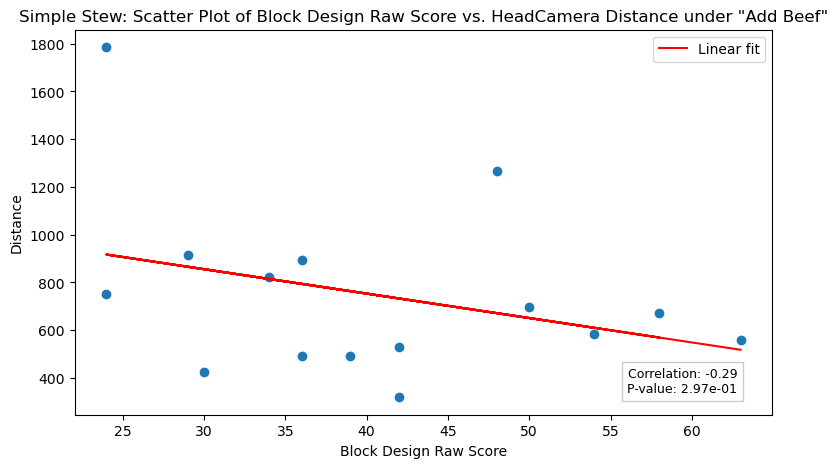

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['HeadCamera Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['HeadCamera Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['HeadCamera Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. HeadCamera Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '17 SS_BeefDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

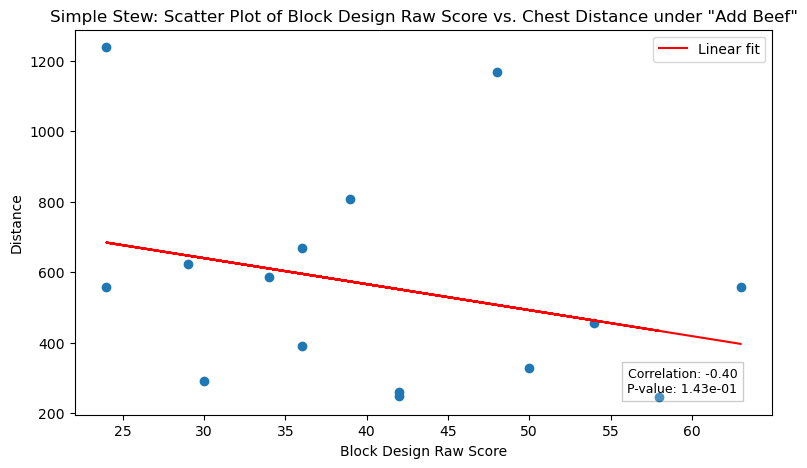

In [10]:
correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['Chest Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['Chest Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['Chest Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Chest Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '18 SS_BeefDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

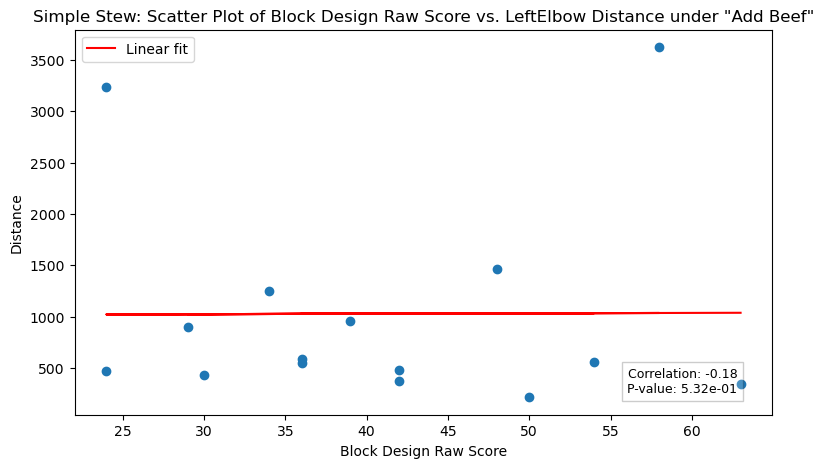

In [11]:
correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['LeftElbow Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['LeftElbow Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['LeftElbow Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. LeftElbow Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '19 SS_BeefDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

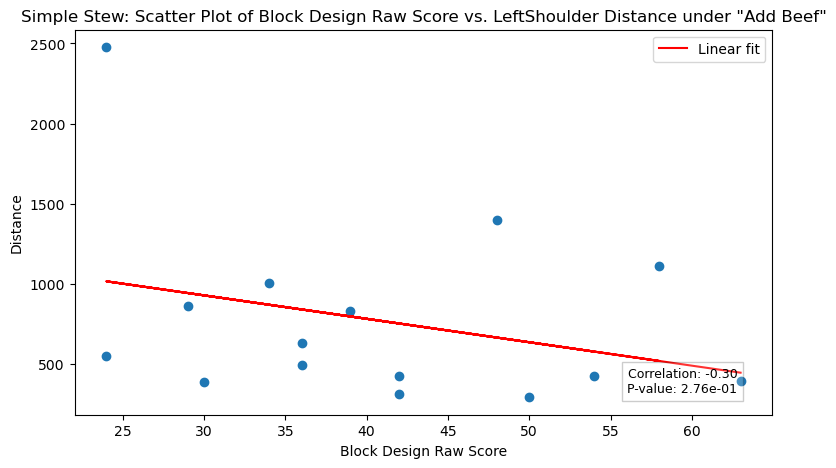

In [12]:
correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['LeftShoulder Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['LeftShoulder Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['LeftShoulder Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. LeftShoulder Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '20 SS_BeefDistanceLeftShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

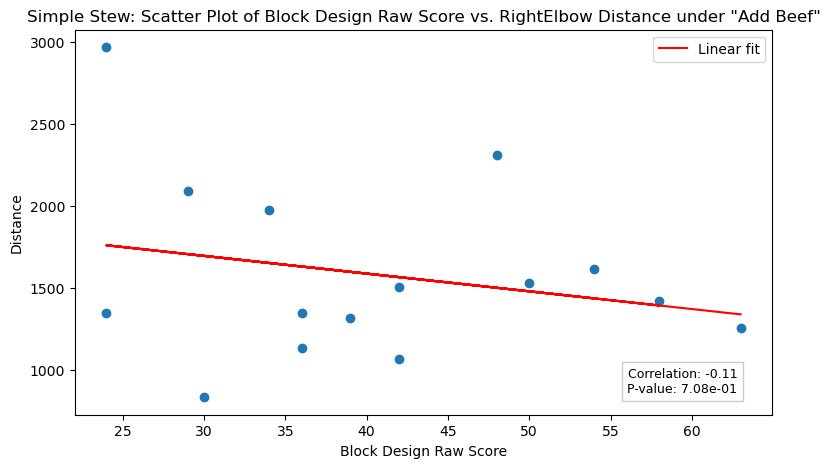

In [13]:
correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['RightElbow Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['RightElbow Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['RightElbow Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. RightElbow Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '21 SS_BeefDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

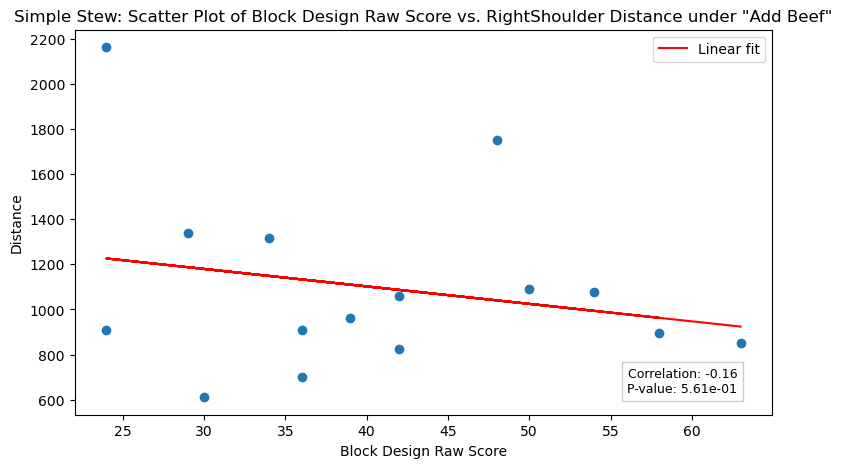

In [14]:
correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['RightShoulder Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['RightShoulder Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['RightShoulder Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. RightShoulder Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '22 SS_BeefDistanceRightShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

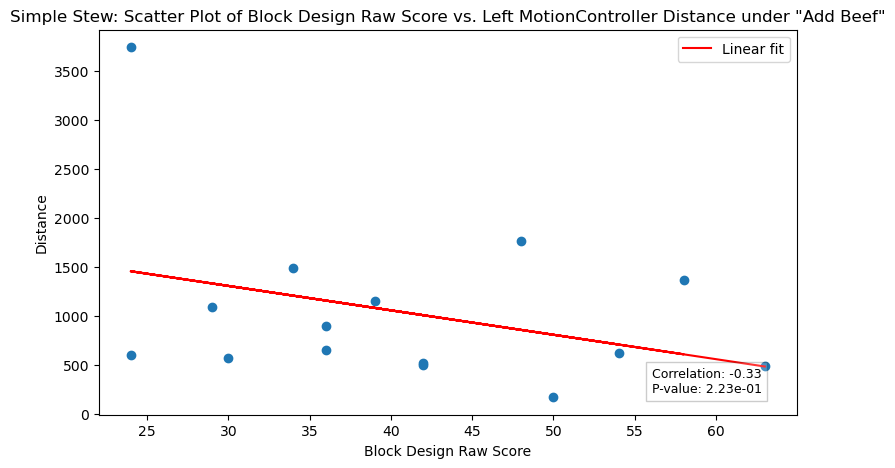

In [15]:
correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerLeft Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerLeft Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerLeft Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '23 SS_BeefDistanceLeftContrlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

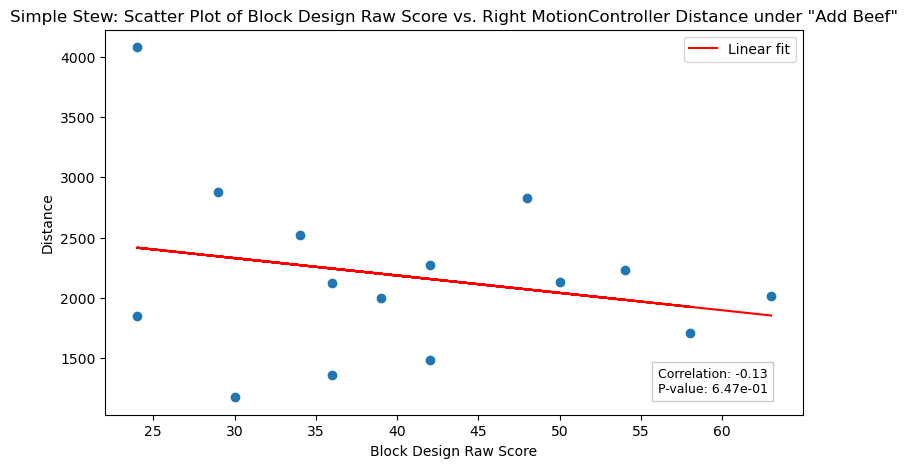

In [16]:
correlation, p_value = spearmanr(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerRight Distance - Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerRight Distance - Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_beef['Block Design Raw Score'], filtered_beef['MotionControllerRight Distance - Add Beef'], 1)
fit_line = slope * filtered_beef['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_beef['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '24 SS_BeefDistanceRightContrlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()